## CS-E4820 Machine Learning: Advanced Probabilistic Methods (spring 2021)

Pekka Marttinen, Santosh Hiremath, Tianyu Cui, Yogesh Kumar, Zheyang Shen, Alexander Aushev, Khaoula El Mekkaoui, Shaoxiong Ji, Alexander Nikitin, Sebastiaan De Peuter, Joakim Järvinen.

## Exercise 8, due on Tuesday March 30 at 23:00.

### Contents
1. Problem 1: Minimize KL divergence using PyTorch
2. Problem 2: VB for a factor analysis model (1/2)
3. Problem 3: VB for a factor analysis model (2/2)

# Problem 1: Minimize KL divergence using PyTorch
PyTorch is a powerful auto-differentiation framework that allows us to do any optimization, as long as we can define the objective function and corresponding optimization variables. It has been widely used for Bayesian deep learning. In this exercise, we will study how to use PyTorch to fit a Gaussian distribution to a known Mixture of Gaussian by minimizing their KL divergence, and compare the difference between the forward and reverse form of the KL.

Recall that the KL divergence between two distributions $q(x)$ and $p(x)$ is defined as:

$$\text{KL}[q(x)|p(x)]=\int q(x)\log\frac{q(x)}{p(x)}dx.$$

This is typically called the **Reverse KL** which we have used before in the course (like in Variational Bayes). If the probability density functions of $q(x)$ and $p(x)$ are known, and we can get samples from $q(x)$, an unbiased estimator of KL divergence is:
$$\text{KL}[q(x)|p(x)]\approx\log\frac{q(x_i)}{p(x_i)}=\log q(x_i)-\log p(x_i),$$
where $x_i\sim q(x)$. We will use above estimator for this exercise.

There is also a **Forward KL**: $\text{KL}[p(x)|q(x)]$ defined as:

$$\text{KL}[p(x)|q(x)]=\int p(x)\log\frac{p(x)}{q(x)}dx,$$

which is used in other inference algorithms such as Expectration Propogation which is not within the scope of this course.

Let $p(x \mid \pi) = \pi \mathcal{N}(0,1)+(1-\pi)\mathcal{N}(8,1)$ where $\pi\sim\text{Bernoulli}(0.4)$ be the true mixture distribution which we want to fit using a Gaussian $q(x; \mu, \sigma)$. We want to estimate $\mu$ and $\sigma$ using both the forwared and reverse KL.

Complete the template below with the relevant code.  

Optimizing reverse KL
EPOACH 1: KL: 3.1620.


/opt/conda/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729096996/work/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


EPOACH 101: KL: 0.2682.
EPOACH 201: KL: 0.3176.
EPOACH 301: KL: 0.3006.
EPOACH 401: KL: 0.3070.
EPOACH 501: KL: 0.3247.
EPOACH 601: KL: 0.3291.
EPOACH 701: KL: 0.3080.
EPOACH 801: KL: 0.2978.
EPOACH 901: KL: 0.3168.
Optimizing forward KL
EPOACH 1: KL: -0.1914.
EPOACH 101: KL: -0.3619.
EPOACH 201: KL: -0.3770.
EPOACH 301: KL: -0.4165.
EPOACH 401: KL: -0.3940.
EPOACH 501: KL: -0.3540.
EPOACH 601: KL: -0.3717.
EPOACH 701: KL: -0.3852.
EPOACH 801: KL: -0.3653.
EPOACH 901: KL: -0.3681.


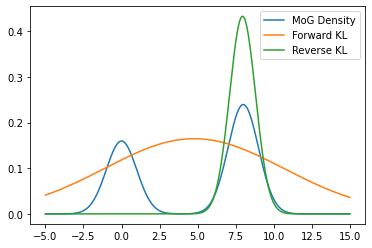

In [1]:
import numpy as np
import math
import torch
import torch.nn as nn
import torch.optim as optim
import torch.distributions as Dis
import matplotlib
import matplotlib.pyplot as plt

class Gaussian:
    """
    This represents q(x) 
    Gaussian distribution is parametrized by mean (mu) and standard deviation. The standard deviation is 
    parametrized as sigma = log(1 + exp(rho)) to make it positive all the time. A sample from the distribution
    can be obtained by first sampling from a unit Gaussian, shifting the samples by the mean and scaling by the 
    standard deviation: w = mu + log(1 + exp(rho)) * epsilon
    """
    def __init__(self, mu, rho):
        self.mean = mu
        self.rho = rho

    @property
    def std_dev(self):
        return torch.log1p(torch.exp(self.rho))

    def sample(self, num_samples = 1):
        # Sample num_samples data points from Gaussian distribution
        # Return a tensor contains all the samples 
        
        # Sample num_samples datapoints from N(0,1) 
        epsilon = Dis.Normal(0,1).sample([num_samples])
        
        # Scale and shift epsilon
        # samples = ? # EXERCISE
        
        # YOUR CODE HERE
        samples = self.mean + self.std_dev * epsilon
        #raise NotImplementedError()
        
        return samples
    
    def logprob(self, samples):
        # Compute the log probability of each sample under Gaussian distribution
        # Return a tensor containing the log probability of all samples        
        
        # logp = ? # EXERCISE
        # YOUR CODE HERE
        logp = -1/2 * torch.log(2*np.pi*self.rho) -1/2*((samples-self.mean)/self.rho)**2
        #print('logp:', logp)
        #raise NotImplementedError()
        
        return logp
    
class MoG:
    """
    This represents p(x).
    In this example, mixture of two Gaussian distribution is constructed by 2 Gaussian distributions 
    N(0,2) and N(8,1), and each datapoint is from N(0,2) with probability p = 0.4 and from N(8,1) with 
    probability 0.6.
    """
    def __init__(self, mu_1=0., sigma_1=1., mu_2=8., sigma_2=1., prob = 0.4):
        self.mean_1 = torch.tensor(mu_1)
        self.sigma_1 = torch.tensor(sigma_1)
        self.mean_2 = torch.tensor(mu_2)
        self.sigma_2 = torch.tensor(sigma_2)
        self.prob = torch.tensor(prob)

    def sample(self, num_samples = 1):
        # Sample num_samples data points from MoG distribution
        # Return a tensor contains all the samples
        
        # sample from N(0, 2)
        # sample form N(8, 1)
        # sample from Bern(0.4)
        # Combine the three to from a sample form mixture
        # sample_gaussian_1 = ? # EXERCISE
        # sample_gaussian_2 = ? # EXERCISE
        # sample_bernoulli = ? # EXERCISE
        # samples  = ? # EXERCISE
        
        # YOUR CODE HERE
        epsilon = Dis.Normal(0,1).sample([num_samples])
        sample_gaussian_1 = self.mean_1 + torch.log(1+torch.exp(self.sigma_1))*epsilon
        sample_gaussian_2 = self.mean_2 + torch.log(1+torch.exp(self.sigma_2))*epsilon
        sample_bernoulli = Dis.Bernoulli(self.prob).sample([num_samples])
        samples = sample_bernoulli*sample_gaussian_1 + (1-sample_bernoulli)*sample_gaussian_2
        
        #raise NotImplementedError()
        
        return samples
    
    def logprob(self, samples):
        
        # Compute the log probability of each sample under the MoG distribution
        # Return a tensor containing the log probability of all samples
        
        # logp = ? # EXERCISE
        
        # YOUR CODE HERE
        N1 = 1/(self.sigma_1*np.sqrt(2*np.pi)) * torch.exp(-1/2 * ((samples-self.mean_1)/self.sigma_1)**2)
        N2 = 1/(self.sigma_2*np.sqrt(2*np.pi)) * torch.exp(-1/2 * ((samples-self.mean_2)/self.sigma_2)**2)
        #print('N2',N2)
        logp = torch.log(self.prob*N1 + (1-self.prob)*N2)
        #print('logp:', logp)
        #raise NotImplementedError()
        
        return logp    

class KL_divergence(nn.Module):
    def __init__(self):
        super(KL_divergence, self).__init__()
        # define the mean and standard deviation as parameters, and initialization
        self.mu = nn.Parameter(torch.Tensor(1).uniform_(-2., 12.))
        self.rho = nn.Parameter(torch.Tensor(1).uniform_(1.0, 5.0))
        
        self.gaussian = Gaussian(self.mu, self.rho)
        self.mog = MoG()
    
    def compute_forwardKL(self):
        num_samples = torch.tensor(1000)
        
        # compute the forward KL divergence between p and q of num_samples data points
        # Return the estimated forward KL divergence
        
        
        # sample form MoG
        # compute forware KL 
        
        # samples = ? # EXERCISE
        # fkl = ? # EXERCISE
        
        # YOUR CODE HERE
        samples = self.mog.sample(num_samples)
        #print('MOG:',self.mog.logprob(samples))
        fkl = torch.mean(self.mog.logprob(samples)-self.gaussian.logprob(samples))
        #raise NotImplementedError()
        
        return fkl
    
    def compute_reverseKL(self):
        num_samples = torch.tensor(1000)
        # compute the reverse KL divergence between p and q with num_samples data points
        # Return the estimated reverse KL divergence
        
        # sample form Gaussian
        # compute reverse KL 
        
        # samples = ? # EXERCISE
        # rkl = ? # EXERCISE
        
        # YOUR CODE HERE
        samples = self.gaussian.sample(num_samples)
        aux = self.gaussian.logprob(samples)-self.mog.logprob(samples)
        #print('aux:',aux)
        rkl = torch.mean(aux)
        #raise NotImplementedError()
        return rkl

# Optimize the KL by using gradient descent
def optimization(kl, forward = False, learning_rate = 0.1, num_epoch = 1000):
    parameters = set(kl.parameters())
    optimizer = optim.Adam(parameters, lr = learning_rate, eps=1e-3)
    
    for epoch in range(num_epoch):
        optimizer.zero_grad()
        if forward:
            loss = kl.compute_forwardKL()
        else:
            loss = kl.compute_reverseKL()
            
        loss.backward()
        optimizer.step()
        
        if (epoch % 100) == 0:
            print('EPOACH %d: KL: %.4f.'% (epoch+1, loss))

print('Optimizing reverse KL')
torch.manual_seed(0)
kl_reverse = KL_divergence()
optimization(kl_reverse, forward = False)
Gaussian_reverse= kl_reverse.gaussian

print('Optimizing forward KL')
kl_forward = KL_divergence()
optimization(kl_forward, forward= True)
Gaussian_forward = kl_forward.gaussian

# Plot the pdf of Gaussian fitted from forward KL and reverse KL, and also the ground truth pdf from MoG
x_plot = torch.linspace(-5., 15., 1000)
density_mog = torch.exp(kl_forward.mog.logprob(x_plot)).detach().numpy()
#density_gaussian = torch.exp(kl_forward.gaussian.logprob(x_plot)).detach().numpy()
density_Gaussian_forward = torch.exp(Gaussian_forward.logprob(x_plot)).detach().numpy()
density_Gaussian_reverse = torch.exp(Gaussian_reverse.logprob(x_plot)).detach().numpy()

fig, ax = plt.subplots()
ax.plot(x_plot, density_mog)
#ax.plot(x_plot, density_gaussian)
ax.plot(x_plot, density_Gaussian_forward)
ax.plot(x_plot, density_Gaussian_reverse)

ax.legend(('MoG Density', 'Forward KL', 'Reverse KL'))

# Problem 2: VB for a factor analysis model (1/2)

The data set consists of $D$-dimensional vectors $\mathbf{x}_{n}\in \mathbb{R}^{D},$ for $n=1,\ldots,N$. We model the data using factor analysis with $K$-dimensional factors $\mathbf{z}_{n}\in\mathbb{R}^{K}$. In detail, the
model is specified as follows:
\begin{align*}
\mathbf{x}_{n} &  \sim\mathcal{N}_{D}(\mathbf{Wz}_{n},\text{diag}
(\mathbf{\psi})^{-1}),\quad n=1,\ldots,N,\\
\psi_{d} &  \sim\text{Gamma}(a,b),\quad d=1,\ldots,D,\\
\mathbf{w}_{d} &  \sim\mathcal{N}_{K}(\mathbf{0,}\alpha\mathbf{I}),\quad
d=1,\ldots,D,\\
\mathbf{z}_{n} &  \sim\mathcal{N}_{K}(\mathbf{0,I}),\quad n=1,\ldots,N.
\end{align*}
Here, $\mathbf{W}$ is a $D\times K$ factor loading matrix and $\mathbf{w}_{d}$ is the $d$th row of $\mathbf{W}$ written as a column vector. Parameter $\psi_{d}^{-1}$ is the variance for the $d$th dimension in the observed data
and diag$(\psi)$ denotes a diagonal matrix with elements $\mathbf{\psi} =(\psi_{1},\ldots,\psi_{D})^{T}$ on the diagonal.

We approximate the posterior $p(\mathbf{\psi},\mathbf{Z},\mathbf{W} |\mathbf{X})$ using the mean-field approximation: 

$$ 
q(\Theta)=\prod_{d=1}^{D}q(\mathbf{w}_{d})\prod_{n=1}^{N}q(\mathbf{z}_{n})\prod_{d=1}^{D}q(\psi_{d}).
$$


__1__ Write the logarithm of the joint distribution, $\log p(\mathbf{\psi},\mathbf{Z},\mathbf{W},\mathbf{X})$.

__2__ Remove from the logarithm of the joint distribution all terms that do not depend on $\mathbf{z}_{n}$.

__3__ Show that the updated factor $q(\mathbf{z}_{n})$ is equal to

$$
q(\mathbf{z}_{n})=\mathcal{N}_{K}(\mathbf{\mu}_{n},\mathbf{K}_{n}),
$$

where

\begin{align*}
\mathbf{K}_{n} &  =\left[  I+\sum_{d=1}^{D}\left\langle \psi_{d}\right\rangle
\left\langle \mathbf{w}_{d}\mathbf{w}_{d}^{T}\right\rangle \right]  ^{-1}
\quad\text{and}\\
\mathbf{\mu}_{n} &  =\mathbf{K}_{n}\left\langle \mathbf{W}^{T}\right\rangle
\text{diag}(\left\langle \mathbf{\psi}\right\rangle )\mathbf{x}_{n}.
\end{align*}

Here $\left\langle \mathbf{\cdot}\right\rangle $ is used as a shorthand for the expectation of a variable with respect to its factor, e.g., $\left\langle \mathbf{\psi}\right\rangle =\mathbb{E}_{q(\mathbf{\psi})}[\mathbf{\psi}]$ etc.

__Hint 1:__ Try to write the log joint as 

$$
-\frac{1}{2}\mathbf{z}_{n}^{T}\mathbf{Az}_{n}+\mathbf{b}^{T}\mathbf{z}_{n}
$$

for some $\mathbf{A}$ and $\mathbf{b}$, after which you can apply the 'completing the square' technique.

__Hint 2:__ Suppose $\mathbf{A}$ is an $N\times M$ matrix. Further suppose that $\mathbf{D}$ is an $N\times N$ diagonal matrix, $\mathbf{D} =$diag$(d_{1},\ldots,d_{N})$. Then $\mathbf{A}^{T}\mathbf{DA}$ can be written
as

$$
\mathbf{A}^{T}\mathbf{DA=}\sum_{n=1}^{N}d_{n}\mathbf{a}_{n}\mathbf{a}_{n}^{T},
$$

where $\mathbf{a}_{n}$ is the $n$th row of $\mathbf{A}$ written as a column vector.

__Hint 3:__ Recall that expectation is a linear operator, i.e. $\mathbb{E}(aX+bY)=a\mathbb{E}(X)+b\mathbb{E}(Y)$. Further, if some random variables $A$ and $B$ are independent, then $\mathbb{E}_{q(A)q(B)} (AB)=\mathbb{E}_{q(A)}(A)\mathbb{E}_{q(B)}(B)$.


### Solution:

__1:__

First of all we know that the joint distrbution can be expressed as:

$$p\left(\mathbf{\psi},\mathbf{Z},\mathbf{W},\mathbf{X}\right) = \prod_{n=1}^N p\left(\mathbf{\psi},\mathbf{z}_n,\mathbf{W},\mathbf{x}_n\right)$$

And descomposing following the dag we have that:

$$p\left(\mathbf{\psi},\mathbf{Z},\mathbf{W},\mathbf{X}\right) = \prod_{n=1}^N p\left(\mathbf{x}_n|\mathbf{\psi},\mathbf{z}_n,\mathbf{W}\right)p\left(\mathbf{\psi}\right)p\left(\mathbf{z}_n\right)p\left(\mathbf{W}\right)$$

Therefore the logarithm will be:

$$\log p\left(\mathbf{\psi},\mathbf{Z},\mathbf{W},\mathbf{X}\right) = \log \left( \prod_{n=1}^N p\left(\mathbf{x}_n|\mathbf{\psi},\mathbf{z}_n,\mathbf{W}\right)p\left(\mathbf{\psi}\right)p\left(\mathbf{z}_n\right)p\left(\mathbf{W}\right) \right) = \sum_{n=1}^N \log \left( p\left(\mathbf{x}_n|\mathbf{\psi},\mathbf{z}_n,\mathbf{W}\right)p\left(\mathbf{\psi}\right)p\left(\mathbf{z}_n\right)p\left(\mathbf{W}\right) \right) = $$
$$= \sum_{n=1}^N \log p\left(\mathbf{x}_n|\mathbf{\psi},\mathbf{z}_n,\mathbf{W}\right) + \log p\left(\mathbf{\psi}\right) + \log p\left(\mathbf{z}_n\right) + \log p\left(\mathbf{W}\right)$$

__2:__

Now, if we remove all the elements that don't depend on $\mathbf{z}_n$ we obtain:

$$\log p\left(\mathbf{\psi},\mathbf{Z},\mathbf{W},\mathbf{X}\right) \propto \sum_{n=1}^N \log p\left(\mathbf{x}_n|\mathbf{\psi},\mathbf{z}_n,\mathbf{W}\right) + \log p\left(\mathbf{z}_n\right)$$

Then, knowing that:

$$\mathbf{x}_n \sim \mathcal{N}_{D}\left(\mathbf{Wz}_n,\text{diag}\left(\mathbf{\psi}\right)^{-1}\right) = \exp\left(-\frac{1}{2}\left(\mathbf{x}_n - \mathbf{Wz}_n\right)^\top \text{diag}\left(\mathbf{\psi}\right) \left(\mathbf{x}_n - \mathbf{Wz}_n\right) \right),\quad n=1,\ldots,N$$
$$\mathbf{z}_n \sim \mathcal{N}_K\left(\mathbf{0,I}\right) = \exp\left(-\frac{1}{2}\mathbf{z}_n^\top \mathbf{z}_n \right),\quad n=1,\ldots,N$$

We have:

$$\log p\left(\mathbf{\psi},\mathbf{Z},\mathbf{W},\mathbf{X}\right) \propto \sum_{n=1}^N \log \exp\left(-\frac{1}{2}\left(\mathbf{x}_n - \mathbf{Wz}_n\right)^\top \text{diag}\left(\mathbf{\psi}\right) \left(\mathbf{x}_n - \mathbf{Wz}_n\right) \right) + \log \exp\left(-\frac{1}{2}\mathbf{z}_n^\top \mathbf{z}_n \right) =$$
$$= \sum_{n=1}^N \left(-\frac{1}{2}\left(\mathbf{x}_n - \mathbf{Wz}_n\right)^\top \text{diag}\left(\mathbf{\psi}\right) \left(\mathbf{x}_n - \mathbf{Wz}_n\right) \right) + \left(-\frac{1}{2}\mathbf{z}_n^\top \mathbf{z}_n \right) = \sum_{n=1}^N -\frac{1}{2} \left( \left(\mathbf{x}_n - \mathbf{Wz}_n\right)^\top \text{diag}\left(\mathbf{\psi}\right) \left(\mathbf{x}_n - \mathbf{Wz}_n\right) + \mathbf{z}_n^\top \mathbf{z}_n \right) =$$
$$= \sum_{n=1}^N -\frac{1}{2} \left(\left(\mathbf{x}_n^\top - \mathbf{z}_n^\top\mathbf{W}^\top\right) \text{diag}\left(\mathbf{\psi}\right) \left(\mathbf{x}_n - \mathbf{Wz}_n\right) + \mathbf{z}_n^\top \mathbf{z}_n\right) = \sum_{n=1}^N -\frac{1}{2} \left(
    \mathbf{x}_n^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{x}_n 
    - 2\mathbf{x}_n^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{Wz}_n
    + \mathbf{z}_n^\top\mathbf{W}^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{Wz}_n
    + \mathbf{z}_n^\top \mathbf{z}_n
\right)$$

Dropping the elements that don't depend on $\mathbf{z}_n$ and solving we continue as:

$$\log p\left(\mathbf{\psi},\mathbf{Z},\mathbf{W},\mathbf{X}\right) \propto  \sum_{n=1}^N -\frac{1}{2} \left(
    - 2\mathbf{x}_n^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{W}\mathbf{z}_n
    + \mathbf{z}_n^\top\left(\mathbf{W}^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{W}+ \mathbf{I}\right)\mathbf{z}_n
\right) =$$
$$= \sum_{n=1}^N -\frac{1}{2} \mathbf{z}_n^\top\left(\mathbf{W}^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{W}+ \mathbf{I}\right)\mathbf{z}_n
+ \left(\left(\mathbf{x}_n^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{W}\right)^\top\right)^\top\mathbf{z}_n =$$
$$= \sum_{n=1}^N -\frac{1}{2} \mathbf{z}_n^\top\left(\mathbf{W}^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{W} + \mathbf{I}\right)\mathbf{z}_n
+ \left(\mathbf{W}^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{x}_n\right)^\top\mathbf{z}_n =$$

Now applying the completing the square technique we obtain:

$$= \sum_{n=1}^N -\frac{1}{2} \left(\mathbf{z}_n - \left(\mathbf{W}^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{W} + \mathbf{I}\right)^{-1} \left(\mathbf{W}^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{x}_n\right) \right)^\top \left(\mathbf{W}^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{W} + \mathbf{I}\right) \left(\mathbf{z}_n - \left(\mathbf{W}^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{W} + \mathbf{I}\right)^{-1} \left(\mathbf{W}^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{x}_n\right) \right) +$$ 
$$+ \frac{1}{2}\left(\left(\mathbf{W}^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{x}_n\right)^\top \left(\mathbf{W}^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{W} + \mathbf{I}\right)^{-1} \left(\mathbf{W}^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{x}_n\right) \right) \propto$$

Finally, we can drop the last term since it doesn't depend on $\mathbf{z}_n$ and knowing that $\mathbf{W}^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{W} = \sum_{d=1}^D \psi_d \mathbf{w}_d \mathbf{w}_d^\top$ we get:

$$\propto \sum_{n=1}^N -\frac{1}{2} \left(\mathbf{z}_n - \left(\sum_{d=1}^D \psi_d \mathbf{w}_d \mathbf{w}_d^\top + \mathbf{I}\right)^{-1} \left(\mathbf{W}^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{x}_n\right) \right)^\top \left(\sum_{d=1}^D \psi_d \mathbf{w}_d \mathbf{w}_d^\top + \mathbf{I}\right)$$
$$\left(\mathbf{z}_n - \left(\sum_{d=1}^D \psi_d \mathbf{w}_d \mathbf{w}_d^\top + \mathbf{I}\right)^{-1} \left(\mathbf{W}^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{x}_n\right) \right)$$

__3:__

$$\log q\left(\mathbf{z}_n\right) = E_{q\left(\mathbf{W}\right)q\left(\mathbf{\psi}\right)}\left[\log p\left(\mathbf{\psi},\mathbf{z}_n,\mathbf{W},\mathbf{x_n}\right)\right] \propto$$
$$\propto E_{q\left(\mathbf{W}\right)q\left(\mathbf{\psi}\right)} \Bigg[-\frac{1}{2} \left(\mathbf{z}_n - \left(\sum_{d=1}^D \psi_d \mathbf{w}_d \mathbf{w}_d^\top + \mathbf{I}\right)^{-1} \left(\mathbf{W}^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{x}_n\right) \right)^\top \left(\sum_{d=1}^D \psi_d \mathbf{w}_d \mathbf{w}_d^\top + \mathbf{I}\right)$$
$$\left(\mathbf{z}_n - \left(\sum_{d=1}^D \psi_d \mathbf{w}_d \mathbf{w}_d^\top + \mathbf{I}\right)^{-1} \left(\mathbf{W}^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{x}_n\right) \right)\Bigg] =$$
$$= -\frac{1}{2} \left(\mathbf{z}_n - \left(\sum_{d=1}^D E_{q\left(\mathbf{\psi}\right)}\left[\psi_d\right] E_{q\left(\mathbf{W}\right)}\left[\mathbf{w}_d \mathbf{w}_d^\top\right] + \mathbf{I}\right)^{-1} \left(E_{q\left(\mathbf{W}\right)}\left[\mathbf{W}^\top\right] \text{diag}\left(E_{q\left(\mathbf{\psi}\right)}\left[\mathbf{\psi}\right]\right) \mathbf{x}_n\right) \right)^\top \left(\sum_{d=1}^D E_{q\left(\mathbf{\psi}\right)}\left[\psi_d\right] E_{q\left(\mathbf{W}\right)}\left[\mathbf{w}_d \mathbf{w}_d^\top\right] + \mathbf{I}\right)$$
$$\left(\mathbf{z}_n - \left(\sum_{d=1}^D E_{q\left(\mathbf{\psi}\right)}\left[\psi_d\right] E_{q\left(\mathbf{W}\right)}\left[\mathbf{w}_d \mathbf{w}_d^\top\right] + \mathbf{I}\right)^{-1} \left(E_{q\left(\mathbf{W}\right)}\left[\mathbf{W}^\top\right] \text{diag}\left(E_{q\left(\mathbf{\psi}\right)}\left[\mathbf{\psi}\right]\right) \mathbf{x}_n\right) \right) =$$

Applying the given notation for $\left\langle \mathbf{\cdot}\right\rangle$

$$= -\frac{1}{2} \left(\mathbf{z}_n - \left(\sum_{d=1}^D \left\langle\psi_d\right\rangle \left\langle\mathbf{w}_d \mathbf{w}_d^\top\right\rangle + \mathbf{I}\right)^{-1} \left(\left\langle\mathbf{W}^\top\right\rangle \text{diag}\left(\left\langle\mathbf{\psi}\right\rangle\right) \mathbf{x}_n\right) \right)^\top \left(\sum_{d=1}^D \left\langle\psi_d\right\rangle \left\langle\mathbf{w}_d \mathbf{w}_d^\top\right\rangle + \mathbf{I}\right)$$
$$\left(\mathbf{z}_n - \left(\sum_{d=1}^D \left\langle\psi_d\right\rangle \left\langle\mathbf{w}_d \mathbf{w}_d^\top\right\rangle + \mathbf{I}\right)^{-1} \left(\left\langle\mathbf{W}^\top\right\rangle \text{diag}\left(\left\langle\mathbf{\psi}\right\rangle\right) \mathbf{x}_n\right) \right)$$

We observe how:
$$q(\mathbf{z}_{n})=\mathcal{N}_{K}(\mathbf{\mu}_{n},\mathbf{K}_{n})$$
where 
$\mathbf{K}_{n} = \left(\sum_{d=1}^D \left\langle\psi_d\right\rangle \left\langle\mathbf{w}_d \mathbf{w}_d^\top\right\rangle + \mathbf{I}\right)^{-1}$
, and 
$\mathbf{\mu}_{n} = \mathbf{K}_{n} \left\langle\mathbf{W}^\top\right\rangle \text{diag}\left(\left\langle\mathbf{\psi}\right\rangle\right) \mathbf{x}_n$.

# Problem 3: VB for a factor analysis model (2/2)
For the factor analysis model considered in Problem 2, derive the update for factor $q(\mathbf{w}_{d})$. The updated factor should be given in terms of the following expectations: $\left\langle \psi_{d}\right\rangle ,\left\langle \mathbf{z}_{n}\right\rangle ,\left\langle \mathbf{z}_{n}\mathbf{z}_{n}^{T}\right\rangle $, which have been calculated using the current values of the other factors for all $d,n$.

__Hint__: A multivariate Gaussian with a diagonal covariance can be expressed as a product of independent univariate Gaussians, which allows you to simplify the formulas.


### Solution:

We will repeat a similar procedure as in exercise 2.

First, we have the logarithm of the joint distribution:

$$\log p\left(\mathbf{\psi},\mathbf{Z},\mathbf{W},\mathbf{X}\right) = \sum_{n=1}^N \log p\left(\mathbf{x}_n|\mathbf{\psi},\mathbf{z}_n,\mathbf{W}\right) + \log p\left(\mathbf{\psi}\right) + \log p\left(\mathbf{z}_n\right) + \log p\left(\mathbf{W}\right)$$

Then we remove all the elements that don't depend on $\mathbf{w}_d$:

$$\log p\left(\mathbf{\psi},\mathbf{Z},\mathbf{W},\mathbf{X}\right) \propto \sum_{n=1}^N \log p\left(\mathbf{x}_n|\mathbf{\psi},\mathbf{z}_n,\mathbf{W}\right) + \log p\left(\mathbf{W}\right) =$$
$$= \sum_{n=1}^N \log p\left(\mathbf{x}_n|\mathbf{\psi},\mathbf{z}_n,\mathbf{W}\right) + \log \prod_{d=1}^D p\left(\mathbf{w}_d\right) =$$
$$= \sum_{n=1}^N \log p\left(\mathbf{x}_n|\mathbf{\psi},\mathbf{z}_n,\mathbf{W}\right) + \sum_{d=1}^D \log p\left(\mathbf{w}_d\right)$$

Then knowing that:

$$\mathbf{x}_n \sim \mathcal{N}_{D}\left(\mathbf{Wz}_n,\text{diag}\left(\mathbf{\psi}\right)^{-1}\right) = \exp\left(-\frac{1}{2}\left(\mathbf{x}_n - \mathbf{Wz}_n\right)^\top \text{diag}\left(\mathbf{\psi}\right) \left(\mathbf{x}_n - \mathbf{Wz}_n\right) \right),\quad n=1,\ldots,N$$
$$\mathbf{w}_{d} \sim \mathcal{N}_K(\mathbf{0,}\alpha\mathbf{I}) = \exp\left(-\frac{1}{2}\mathbf{w}_d^\top\alpha^{-1}\mathbf{I}\mathbf{w}_d\right), \quad d=1,\ldots,D$$

We have:

$$\log p\left(\mathbf{\psi},\mathbf{Z},\mathbf{W},\mathbf{X}\right) \propto \sum_{n=1}^N \log \exp\left(-\frac{1}{2}\left(\mathbf{x}_n - \mathbf{Wz}_n\right)^\top \text{diag}\left(\mathbf{\psi}\right) \left(\mathbf{x}_n - \mathbf{Wz}_n\right) \right) + \sum_{d=1}^D \log \exp\left(-\frac{1}{2}\mathbf{w}_d^\top\alpha^{-1}\mathbf{I}\mathbf{w}_d\right) =$$
$$= \sum_{n=1}^N -\frac{1}{2}\left(\mathbf{x}_n - \mathbf{Wz}_n\right)^\top \text{diag}\left(\mathbf{\psi}\right) \left(\mathbf{x}_n - \mathbf{Wz}_n\right) + \sum_{d=1}^D -\frac{1}{2}\mathbf{w}_d^\top\alpha^{-1}\mathbf{I}\mathbf{w}_d =$$
$$= \sum_{n=1}^N -\frac{1}{2}\left(\left(\mathbf{x}_n - \mathbf{Wz}_n\right)^\top \text{diag}\left(\mathbf{\psi}\right) \left(\mathbf{x}_n - \mathbf{Wz}_n\right) + \sum_{d=1}^D \mathbf{w}_d^\top\alpha^{-1}\mathbf{I}\mathbf{w}_d\right) =$$
$$
= \sum_{n=1}^N -\frac{1}{2} \left(
    \mathbf{x}_n^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{x}_n 
    - 2\mathbf{x}_n^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{Wz}_n
    + \mathbf{z}_n^\top\mathbf{W}^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{Wz}_n
    + \sum_{d=1}^D \mathbf{w}_d^\top\alpha^{-1}\mathbf{I}\mathbf{w}_d
\right)
$$

Dropping the elements that don't depend on $\mathbf{w}_d$ and solving we continue as:

$$
= \sum_{n=1}^N -\frac{1}{2} \left(
    - 2\mathbf{x}_n^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{Wz}_n
    + \mathbf{z}_n^\top\mathbf{W}^\top \text{diag}\left(\mathbf{\psi}\right) \mathbf{Wz}_n
    + \sum_{d=1}^D \mathbf{w}_d^\top\alpha^{-1}\mathbf{I}\mathbf{w}_d
\right) =
$$
$$
= \sum_{n=1}^N -\frac{1}{2} \left(
    - 2 \sum_{d=1}^D \mathbf{x}_{nd}^\top \mathbf{\psi}_d \mathbf{w}_d\mathbf{z}_n
    + \mathbf{z}_n^\top \sum_{d=1}^D \mathbf{\psi}_d \mathbf{w}_d \mathbf{w}_d^\top \mathbf{z}_n
    + \sum_{d=1}^D \mathbf{w}_d^\top\alpha^{-1}\mathbf{I}\mathbf{w}_d
\right) =
$$
$$
= \sum_{n=1}^N \sum_{d=1}^D -\frac{1}{2} \left(
    - 2 \mathbf{x}_{nd}^\top \mathbf{\psi}_d \mathbf{w}_d\mathbf{z}_n
    + \mathbf{z}_n^\top \mathbf{\psi}_d \mathbf{w}_d \mathbf{w}_d^\top \mathbf{z}_n
    + \mathbf{w}_d^\top\alpha^{-1}\mathbf{I}\mathbf{w}_d
\right) =
$$
$$
= \sum_{n=1}^N \sum_{d=1}^D \left(
    \mathbf{x}_{nd}^\top \mathbf{\psi}_d \mathbf{w}_d\mathbf{z}_n
    -\frac{1}{2} \mathbf{z}_n^\top \mathbf{\psi}_d \mathbf{w}_d \mathbf{w}_d^\top \mathbf{z}_n
    -\frac{1}{2} \mathbf{w}_d^\top\alpha^{-1}\mathbf{I}\mathbf{w}_d
\right)
$$

Therefore, we can compute $q(\mathbf{w}_d)$ as:

$$q(\mathbf{w}_d) = E_{q\left(\mathbf{z}_n\right)q\left(\mathbf{\psi}\right)}\left[\log p\left(\mathbf{\psi},\mathbf{z}_n,\mathbf{W},\mathbf{x_n}\right)\right] \propto$$
$$
\propto 
E_{q\left(\mathbf{z}_n\right)q\left(\mathbf{\psi}\right)}\left[
    \sum_{n=1}^N \left(
        \mathbf{x}_{nd}^\top \mathbf{\psi}_d \mathbf{w}_d\mathbf{z}_n
        -\frac{1}{2} \mathbf{z}_n^\top \mathbf{\psi}_d \mathbf{w}_d \mathbf{w}_d^\top \mathbf{z}_n
        -\frac{1}{2} \mathbf{w}_d^\top\alpha^{-1}\mathbf{I}\mathbf{w}_d
    \right)
\right]
=
$$
$$
= 
\sum_{n=1}^N \left(
    \mathbf{x}_{nd}^\top E_{q\left(\mathbf{\psi}\right)}\left[\mathbf{\psi}_d\right] \mathbf{w}_d E_{q\left(\mathbf{z}_n\right)}\left[\mathbf{z}_n\right]
    -\frac{1}{2} E_{q\left(\mathbf{z}_n\right)}\left[\mathbf{z}_n^\top\right] E_{q\left(\mathbf{\psi}\right)}\left[\mathbf{\psi}_d\right] \mathbf{w}_d \mathbf{w}_d^\top E_{q\left(\mathbf{z}_n\right)}\left[\mathbf{z}_n\right]
    -\frac{1}{2} \mathbf{w}_d^\top\alpha^{-1}\mathbf{I}\mathbf{w}_d
\right)
$$
$$
= 
\sum_{n=1}^N \left(
    \mathbf{x}_{nd}^\top \left\langle \mathbf{\psi}_d \right\rangle \mathbf{w}_d \left\langle \mathbf{z}_n \right\rangle
    -\frac{1}{2} \left\langle \mathbf{z}_n^\top \right\rangle \left\langle \mathbf{\psi}_d \right\rangle \mathbf{w}_d \mathbf{w}_d^\top \left\langle \mathbf{z}_n \right\rangle
    -\frac{1}{2} \mathbf{w}_d^\top\alpha^{-1}\mathbf{I}\mathbf{w}_d
\right)
=
$$
$$
= 
\sum_{n=1}^N \left(
    \mathbf{x}_{nd}^\top \left\langle \mathbf{\psi}_d \right\rangle \mathbf{w}_d \left\langle \mathbf{z}_n \right\rangle
    -\frac{1}{2} \left\langle \mathbf{\psi}_d \right\rangle \mathbf{w}_d \mathbf{w}_d^\top \left\langle \mathbf{z}_n \mathbf{z}_n^\top \right\rangle
    -\frac{1}{2} \mathbf{w}_d^\top\alpha^{-1}\mathbf{I}\mathbf{w}_d
\right)
$$